In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelsize'] = 12

In [3]:
propiedades = pd.read_csv('properati.csv')
#propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/properati.csv')

In [4]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455309 entries, 0 to 2455308
Data columns (total 23 columns):
created_on                    object
currency                      object
expenses                      float64
fecha_de_publicacion          object
floor                         float64
lat                           float64
lon                           float64
place_name                    object
place_with_parent_names       object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
property_type                 object
rooms                         float64
state_name                    object
superficie                    float64
Year                          int64
Month                         int64
Year_created                  int64
Month_created                 int64
cantidad_meses_publicado      int64
dtypes: float64(11), int64(5),

In [5]:
#Compruebo que solo haya capital y gba
propiedades.groupby('state_name').agg(np.size)['floor']

state_name
Bs.As. G.B.A. Zona Norte    820412.0
Bs.As. G.B.A. Zona Oeste    466592.0
Bs.As. G.B.A. Zona Sur      238355.0
Capital Federal             929950.0
Name: floor, dtype: float64

### Como es el precio por metro cuadrado en cada zona? Cuales son los barrios con mayor promedio?

In [4]:
tiene_precio = propiedades['price_usd_per_m2'].notnull()

In [5]:
precio_por_zona = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 10000,['state_name','price_usd_per_m2','lat']]
precio_por_zona.loc[:,'state_name'] = precio_por_zona.loc[:,'state_name'].str.lstrip('Bs.As. ')
precio_por_zona = pd.pivot_table(precio_por_zona, values='price_usd_per_m2', columns=['state_name'],index = 'lat')
precio_por_zona.head(2)

state_name  Capital Federal  G.B.A. Zona Norte  G.B.A. Zona Oeste  \
lat                                                                 
-89.999744           2200.0                NaN                NaN   
-87.953559              NaN        1833.333333                NaN   

state_name  G.B.A. Zona Sur  
lat                          
-89.999744              NaN  
-87.953559              NaN

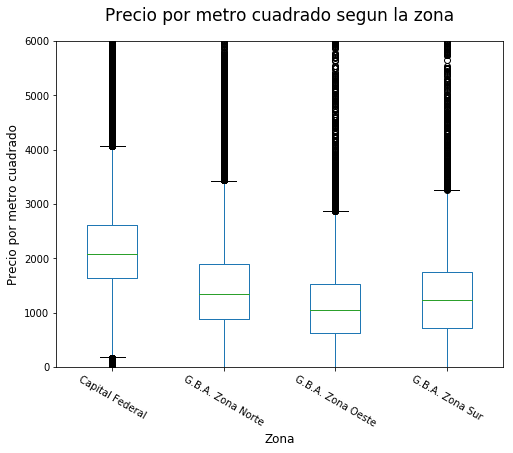

In [46]:
plot = precio_por_zona.plot(kind='box', title = "Precio por metro cuadrado segun la zona", rot = -30);
plot.set_xlabel("Zona")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_ylim([0,6000])

plt.savefig('informe/imagenes/precio_m2.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para capital federal

In [16]:
precios_capital = propiedades[tiene_precio].loc[(propiedades.state_name == 'Capital Federal') & (propiedades.place_name != 'Capital Federal')\
                                                ,['place_name','price_usd_per_m2']]
precios_capital = precios_capital.groupby('place_name').agg([np.size,np.mean])
precios_capital.describe()

price_usd_per_m2             
                  size         mean
count        62.000000    62.000000
mean       9916.483871  2362.705459
std       13471.621911   848.444749
min           1.000000   946.108213
25%        1540.750000  1910.677812
50%        5537.000000  2212.195475
75%       11857.000000  2505.198477
max       73901.000000  6392.615387

In [17]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_capital = precios_capital[precios_capital[('price_usd_per_m2','size')] > 800]

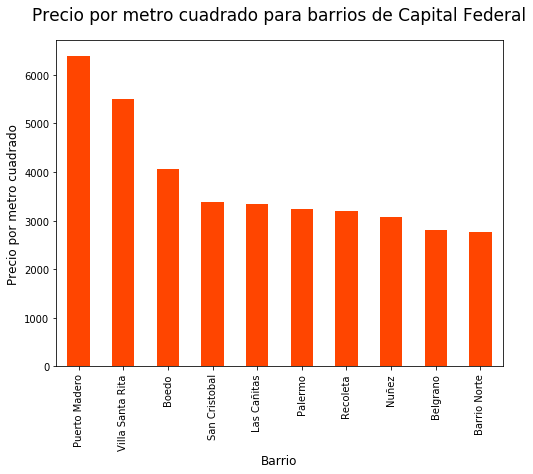

In [45]:
plot = precios_capital[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', color = 'orangered');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de Capital Federal")

plt.savefig('informe/imagenes/precio_m2_capital.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para gba zona norte

In [35]:
precios_zona_norte = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Norte'),['place_name','price_usd_per_m2']]
precios_zona_norte = precios_zona_norte.groupby('place_name').agg([np.size,np.mean])
precios_zona_norte.describe()

price_usd_per_m2              
                  size          mean
count       340.000000    340.000000
mean       1794.217647   1684.577780
std        7414.215056   1945.461670
min           1.000000     86.700571
25%          17.000000   1007.050859
50%          69.000000   1290.205656
75%         260.250000   1857.814938
max       68810.000000  28194.815849

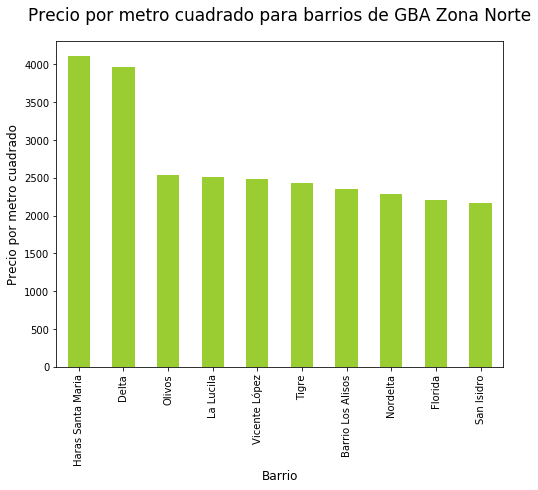

In [44]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_norte = precios_zona_norte[precios_zona_norte[('price_usd_per_m2','size')] > 800]
plot = precios_zona_norte[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar',color = 'yellowgreen');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Norte")

plt.savefig('informe/imagenes/precio_m2_norte.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para gba zona oeste

In [47]:
precios_zona_oeste = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Oeste'),['place_name','price_usd_per_m2']]
precios_zona_oeste = precios_zona_oeste.groupby('place_name').agg([np.size,np.mean])
precios_zona_oeste.describe()

price_usd_per_m2              
                  size          mean
count        88.000000     88.000000
mean       3034.602273   1402.926238
std        7045.519291   1558.779652
min           1.000000     40.870430
25%          66.750000    770.781965
50%         346.000000   1055.920853
75%        2194.750000   1539.934805
max       48490.000000  11598.750000

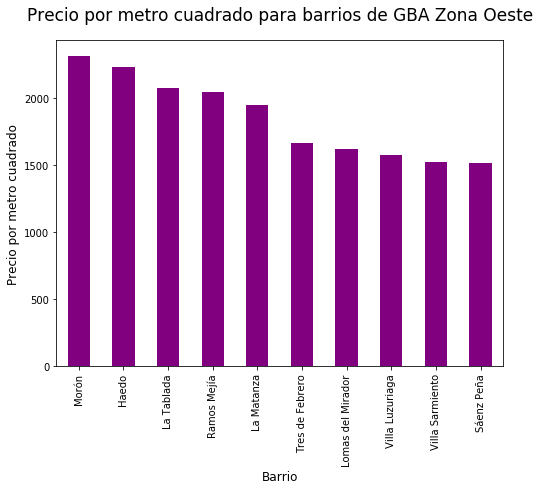

In [48]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_oeste = precios_zona_oeste[precios_zona_oeste[('price_usd_per_m2','size')] > 800]
plot = precios_zona_oeste[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', color = 'purple');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Oeste")

plt.savefig('informe/imagenes/precios_m2_oeste.png', bbox_inches = 'tight', pad_inches = 0.5)

### Para gba zona sur

In [49]:
precios_zona_sur = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Sur'),['place_name','price_usd_per_m2']]
precios_zona_sur = precios_zona_sur.groupby('place_name').agg([np.size,np.mean])
precios_zona_sur.describe()

price_usd_per_m2               
                  size           mean
count       144.000000     144.000000
mean        906.069444    2342.159877
std        2844.642482    9190.094238
min           1.000000       0.000000
25%          24.000000     643.241429
50%          72.500000    1087.644434
75%         451.250000    1594.669353
max       22160.000000  102857.142857

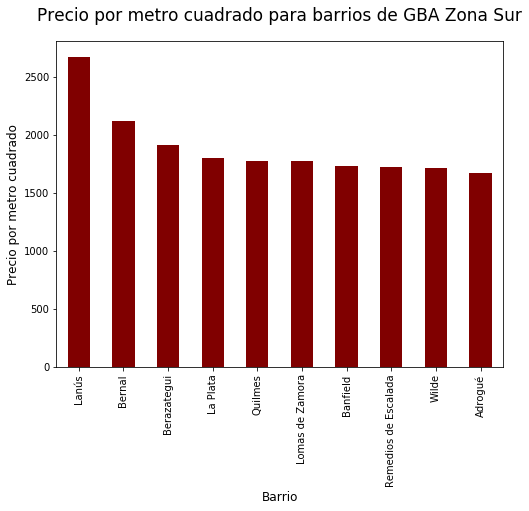

In [50]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_sur = precios_zona_sur[precios_zona_sur[('price_usd_per_m2','size')] > 800]
plot = precios_zona_sur[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar',color = 'maroon');
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Sur")

plt.savefig('informe/imagenes/precios_m2_sur.png', bbox_inches = 'tight', pad_inches = 0.5)

### Como evoluciono el precio por metro cuadrado al pasar los anios?

In [6]:
precio_por_anio = propiedades[tiene_precio].loc[:,['Year','price_usd_per_m2']].groupby('Year').agg([np.size,np.mean])
precio_por_anio = precio_por_anio.loc[precio_por_anio[('price_usd_per_m2','size')] > 100,:]
precio_por_anio

price_usd_per_m2             
                 size         mean
Year                              
2013         199349.0  2369.190254
2014         345284.0  1890.479226
2015         450676.0  1714.803593
2016         311484.0  2151.086818
2017         381930.0  2735.672688

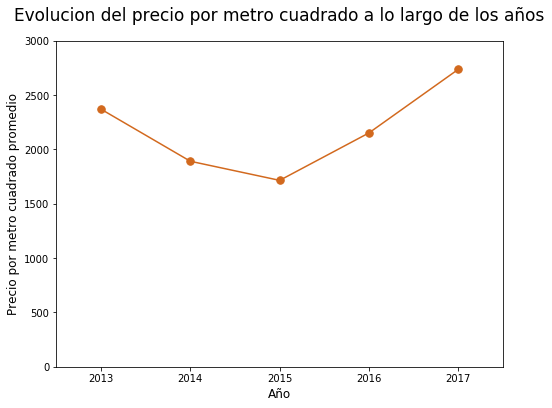

In [7]:
plot = precio_por_anio[('price_usd_per_m2','mean')].plot(marker = '.', markersize = 15, color = 'chocolate');
plot.set_xlabel("Año")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_ylim([0,3000])
plot.set_xlim([2012.5,2017.5])
plot.set_xticks([2013,2014,2015,2016,2017])
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años");

plt.savefig('informe/imagenes/evolucion_pecio_m2.png', bbox_inches = 'tight', pad_inches = 0.5)

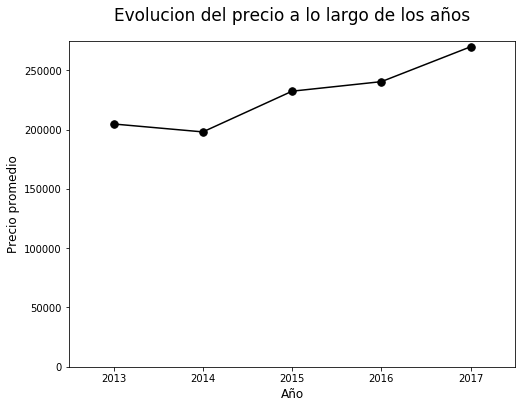

In [8]:
precio_por_anio2 = propiedades.loc[propiedades.price_aprox_usd.notnull(),['Year','price_aprox_usd']].groupby('Year').agg([np.size,np.mean])
precio_por_anio2 = precio_por_anio2.loc[precio_por_anio2[('price_aprox_usd','size')] > 100,:]
plot = precio_por_anio2[('price_aprox_usd','mean')].plot(color='black',marker = '.', markersize = 15);
plot.set_xlabel("Año")
plot.set_ylabel("Precio promedio")
plot.set_ylim([0,275000])
plot.set_xlim([2012.5,2017.5])
plot.set_title("Evolucion del precio a lo largo de los años")
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_precio.png', bbox_inches = 'tight', pad_inches = 0.5)

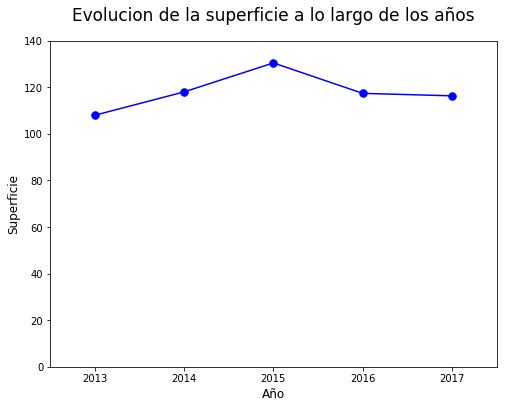

In [9]:
precio_por_anio3 = propiedades.loc[(propiedades.superficie.notnull()) & (propiedades.superficie < 500),['Year','superficie']].groupby('Year').agg([np.size,np.mean])
precio_por_anio3 = precio_por_anio3.loc[precio_por_anio3[('superficie','size')] > 100,:]
plot = precio_por_anio3[('superficie','mean')].plot(color='blue',marker = '.', markersize = 15);
plot.set_xlabel("Año")
plot.set_ylabel("Superficie")
plot.set_title("Evolucion de la superficie a lo largo de los años")
plot.set_xlim([2012.5,2017.5])
plot.set_ylim([0,140])
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_superficie.png', bbox_inches = 'tight', pad_inches = 0.5)

### Como evoluciono el precio por metro cuadrado en en cada anio?

In [10]:
precios_2016 = propiedades[tiene_precio].loc[propiedades.Year == 2016,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2015 = propiedades[tiene_precio].loc[propiedades.Year == 2015,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2014 = propiedades[tiene_precio].loc[propiedades.Year == 2014,['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)


In [11]:
precios_2016 = precios_2016.rename(columns={'price_usd_per_m2': '2016'}).reset_index()
precios_2015 = precios_2015.rename(columns={'price_usd_per_m2': '2015'}).reset_index()
precios_2014 = precios_2014.rename(columns={'price_usd_per_m2': '2014'}).reset_index()
precios = pd.merge(precios_2016,precios_2015,on='Month',how='outer')
precios = pd.merge(precios,precios_2014,on='Month',how='outer')
precios.set_index('Month', inplace = True)
precios

2016         2015         2014
Month                                       
1      1831.190767  1677.568481  2102.573404
2      1849.816972  1723.479619  2079.900913
3      1966.921313  1565.270512  1912.878483
4      2059.532984  1583.533208  1928.181890
5      2078.260781  1607.606635  1911.892901
6      2095.725003  1629.178322  1928.651897
7      2160.555576  1618.955606  1938.728071
8      2208.922107  1712.221020  1697.860709
9      2231.013673  1657.230560  1657.700065
10     2222.564192  1688.942531  1650.582885
11     2352.288746  2084.934236  1658.948582
12     2358.036328  1820.026129  1661.808174

In [12]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',\
                 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

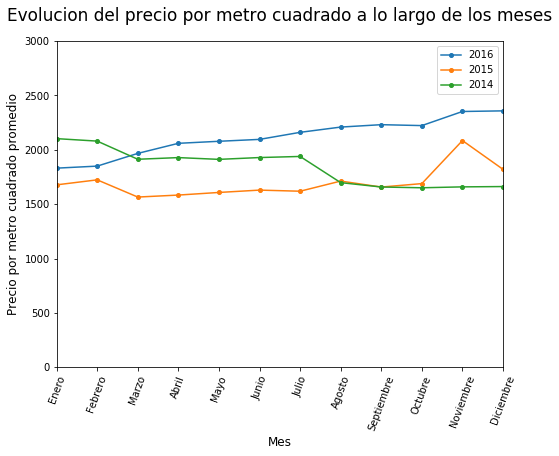

In [13]:
plot = precios.plot(rot = 70, marker = '.', markersize = 8);
plot.set_xlabel("Mes")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los meses")
plot.set_ylim([0,3000]);
plot.set_xticks(precios.index);
plot.set_xticklabels(meses);

plt.savefig('informe/imagenes/evolucion_precio_m2_por_mes.png', bbox_inches = 'tight', pad_inches = 0.5)

### Que tipo de propiedad se vende mas?

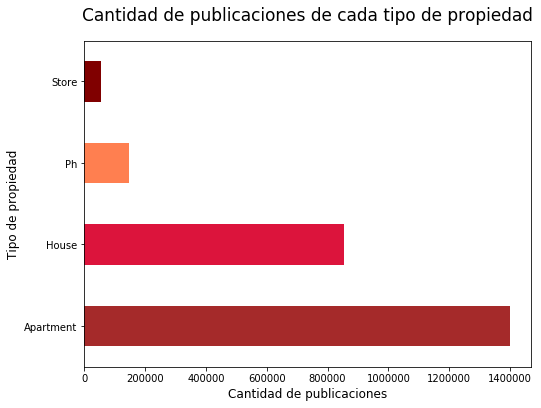

In [59]:
colors_prop = ['brown','crimson', 'coral', 'maroon']
tipos_propiedades = propiedades.loc[:,'property_type'].str.capitalize().value_counts()
plot = tipos_propiedades.plot(kind='barh', color = [colors_prop]);
plot.set_title("Cantidad de publicaciones de cada tipo de propiedad")
plot.set_ylabel("Tipo de propiedad")
plot.set_xlabel("Cantidad de publicaciones")

plt.savefig('informe/imagenes/publicaciones_por_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

In [60]:
precio_tipos_propiedades = propiedades.loc[(propiedades.price_aprox_usd <= 2000000) & (propiedades.price_aprox_usd >= 10000)\
                                           ,['property_type','price_aprox_usd','lat']]
precio_tipos_propiedades.loc[:,'property_type'] = precio_tipos_propiedades.loc[:,'property_type'].str.capitalize()

precio_tipos_propiedades = pd.pivot_table(precio_tipos_propiedades, values='price_aprox_usd', columns=['property_type'],index = 'lat')

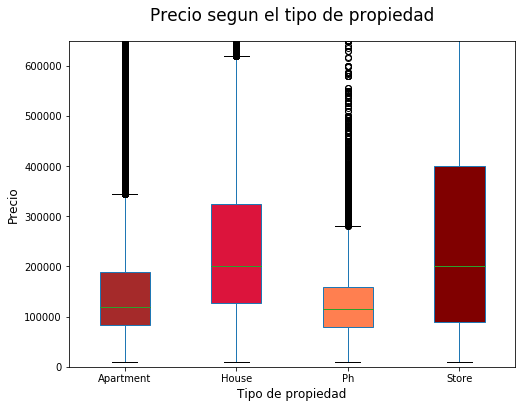

In [61]:
plot = precio_tipos_propiedades.plot.box(patch_artist=True,return_type='dict')
ax=plt.gca()
ax.set_xlabel("Tipo de propiedad")
ax.set_ylabel("Precio")
ax.set_title("Precio segun el tipo de propiedad")
ax.set_ylim([0,650000])

for patch, color in zip(plot['boxes'], colors_prop ):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/precio_segun_tipo_propiedad.png', bbox_inches = 'tight', pad_inches = 0.5)

### Cual es la relacion entre la superficie cubierta y la cantidad de habitaciones?

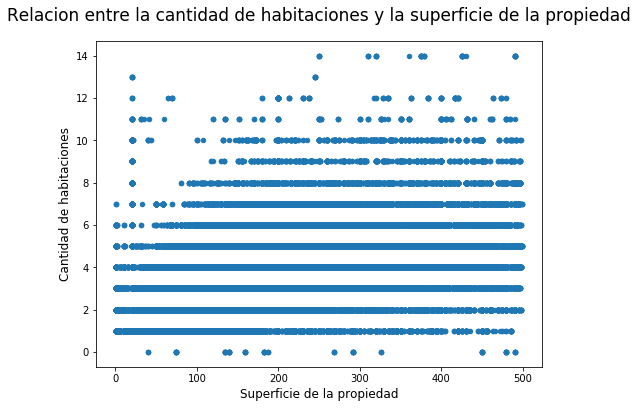

In [62]:
tiene_superficie = propiedades['superficie'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull()
habitaciones = propiedades.loc[tiene_superficie & tiene_habitaciones,:]
habitaciones = habitaciones.loc[(habitaciones['superficie'] < 500) & (habitaciones['rooms'] < 15 ),:]
plot = habitaciones.plot.scatter(x = 'superficie', y = 'rooms');
plot.set_xlabel("Superficie de la propiedad")
plot.set_ylabel("Cantidad de habitaciones")
plot.set_title("Relacion entre la cantidad de habitaciones y la superficie de la propiedad")

plt.savefig('informe/imagenes/cantidad_habitaciones_y_superficie.png', bbox_inches = 'tight', pad_inches = 0.5)

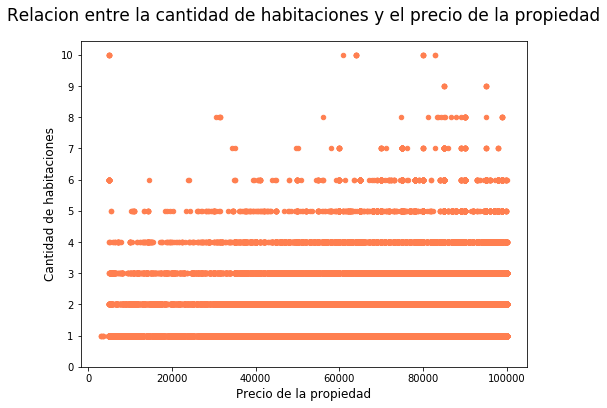

In [63]:
tiene_precio_usd = propiedades['price_aprox_usd'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull() & propiedades['rooms'] > 0
hab = propiedades.loc[tiene_precio_usd & tiene_habitaciones,:]
hab = hab.loc[(hab['price_aprox_usd'] > 1000) & (hab['price_aprox_usd'] < 100000) & (hab['rooms'] <= 10),:]
plot = hab.plot.scatter(x = 'price_aprox_usd', y = 'rooms', color = 'coral');
plot.set_xlabel("Precio de la propiedad")
plot.set_ylabel("Cantidad de habitaciones")
plot.set_title("Relacion entre la cantidad de habitaciones y el precio de la propiedad")
plot.set_yticks(list(range(11)));

plt.savefig('informe/imagenes/cantidad_habitaciones_y_precio.png', bbox_inches = 'tight', pad_inches = 0.5)

##### se ve que las propiedades mas baratas no tiene mas de 4-5 habitaciones y que solo las mas caras tiene mas de 6

## Tomamos algunos barrios importantes y hacemos comparaciones

In [14]:
barrios = ['Palermo', 'Vicente López', 'Lomas de Zamora', 'La Matanza']  #Elegi uno de cada zona
df = []
for barrio in barrios:
    a = propiedades[tiene_precio].loc[propiedades.place_name == barrio,['Year','price_usd_per_m2']]\
    .groupby('Year').agg(np.mean).reset_index().rename(columns={'price_usd_per_m2' : barrio})
    df.append(a)

In [15]:
precios_barrios = df[0]
for x in range (1,len(barrios)):
    precios_barrios = pd.merge(precios_barrios,df[x],how='outer')
precios_barrios.set_index("Year",inplace = True)
precios_barrios

Palermo  Vicente López  Lomas de Zamora   La Matanza
Year                                                          
2013  3045.593394    2773.353764      2468.826751  2821.583231
2014  2965.790436    2175.935660      1587.086071  1867.924150
2015  3139.452200    2140.177017      1592.004317  1625.846192
2016  3318.524747    2429.855370      1612.371211  1930.060818
2017  3601.772003    3346.559792      1997.987134  1888.998619

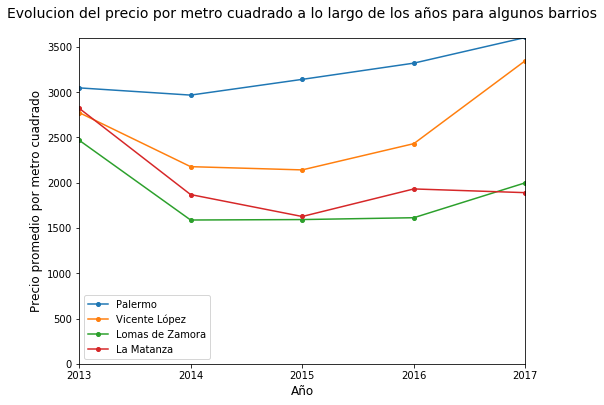

In [16]:
plot = precios_barrios.plot(marker = '.', markersize = 8);
plot.set_xlabel("Año")
plot.set_ylabel("Precio promedio por metro cuadrado")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años para algunos barrios",size = 14)
plot.set_ylim([0,3600]);
plot.set_xticks([2013,2014,2015,2016,2017]);

plt.savefig('informe/imagenes/evolucion_precio_m2_algunos_barrios.png', bbox_inches = 'tight', pad_inches = 0.5)

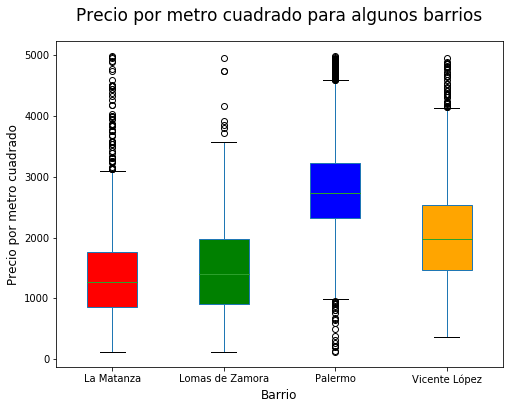

In [17]:
precios_barrios2 = propiedades.loc[(propiedades.price_usd_per_m2 < 5000) &\
                        (propiedades.price_usd_per_m2 > 100)&((propiedades.place_name == barrios[0]) | \
                          (propiedades.place_name == barrios[1]) | (propiedades.place_name == barrios[2])\
                        | (propiedades.place_name == barrios[3])),\
        ['lon','place_name','price_usd_per_m2']].pivot_table(index='lon',columns='place_name')
precios_barrios2.columns = precios_barrios2.columns.droplevel()
boxplot = precios_barrios2.plot.box(patch_artist=True,return_type='dict', title="Precio por metro cuadrado para algunos barrios");
ax=plt.gca()
ax.set_ylabel('Precio por metro cuadrado')
ax.set_xlabel('Barrio')


colors = ['red' , 'green', 'blue', 'orange'] #Mismos colores del grafico de lineas de arriba
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/precio_m2_algunos_barrios.png', bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precios y distancia a lugares importantes

In [18]:
#El archivo es el obtenido al ejecutar Calcular distancias

solo_capital = pd.read_csv('solo_capital.csv')
#solo_capital = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/solo_capital.csv')

In [69]:
solo_capital['distancia_monumentos'].describe()

count    854797.000000
mean          4.366964
std           6.579666
min           0.023206
25%           1.469629
50%           3.046057
75%           5.600211
max         450.296945
Name: distancia_monumentos, dtype: float64

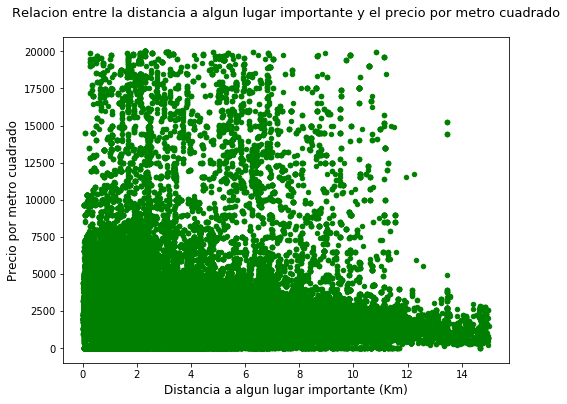

In [70]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_monumentos < 15),:]
plot = dist.plot.scatter(x = 'distancia_monumentos', y = 'price_usd_per_m2', color = 'green');
plot.set_xlabel("Distancia a algun lugar importante (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a algun lugar importante y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_precio_distancia_lugares_importantes.png', bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre el precio y cercania a los subtes

In [71]:
solo_capital['distancia_subtes'].describe()

count    854797.000000
mean          1.616011
std           5.883526
min           0.000356
25%           0.386925
50%           0.629416
75%           1.159004
max         444.444997
Name: distancia_subtes, dtype: float64

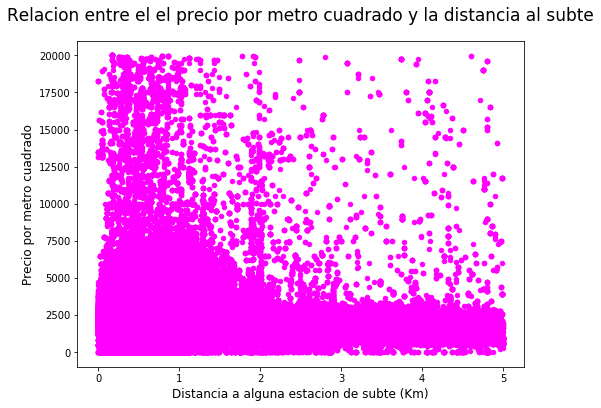

In [72]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_subtes < 5),:]
plot = dist.plot.scatter(x = 'distancia_subtes', y = 'price_usd_per_m2', color = 'fuchsia');
plot.set_xlabel("Distancia a alguna estacion de subte (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre el el precio por metro cuadrado y la distancia al subte")

plt.savefig('informe/imagenes/Relacion_precio_distancia_subte.png', bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre el precio y el piso del depto

In [73]:
piso_maximo = 20  

departamentos = propiedades.loc[(propiedades.property_type == 'apartment') & (propiedades.floor.notnull())\
                               & (propiedades.floor <= piso_maximo)]
departamentos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388377 entries, 0 to 2455239
Data columns (total 23 columns):
created_on                    388377 non-null object
currency                      355983 non-null object
expenses                      36083 non-null float64
fecha_de_publicacion          388377 non-null object
floor                         388377 non-null float64
lat                           293036 non-null float64
lon                           293036 non-null float64
place_name                    388377 non-null object
place_with_parent_names       388377 non-null object
price                         357355 non-null float64
price_aprox_local_currency    357355 non-null float64
price_aprox_usd               357355 non-null float64
price_per_m2                  102967 non-null float64
price_usd_per_m2              297383 non-null float64
property_type                 388377 non-null object
rooms                         266207 non-null float64
state_name                    3

In [74]:
departamentos['floor'].describe()

count    388377.000000
mean          4.504072
std           3.615925
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          20.000000
Name: floor, dtype: float64

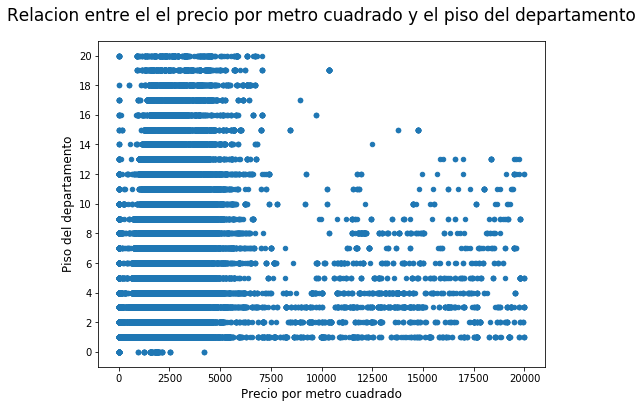

In [75]:
plot = departamentos.loc[(departamentos.price_usd_per_m2.notnull()) & (departamentos.price_usd_per_m2 <= 20000), :].plot\
            .scatter(y = 'floor', x = 'price_usd_per_m2');
plot.set_ylabel("Piso del departamento");
plot.set_xlabel("Precio por metro cuadrado");
plot.set_title("Relacion entre el el precio por metro cuadrado y el piso del departamento");
plot.set_yticks(list(range(0,21,2)));

plt.savefig('informe/imagenes/Relacion_precio_piso.png', bbox_inches = 'tight', pad_inches = 0.5)

#### cuanto mas alto, mas barato el precio por m2

# relacion entre expensas y precio total

In [76]:
expensas = propiedades.loc[(propiedades.expenses.notnull()) & (propiedades.expenses <= 10000) & (propiedades.expenses > 100),:]
expensas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120606 entries, 56 to 2455308
Data columns (total 23 columns):
created_on                    120606 non-null object
currency                      114941 non-null object
expenses                      120606 non-null float64
fecha_de_publicacion          120606 non-null object
floor                         36153 non-null float64
lat                           107699 non-null float64
lon                           107699 non-null float64
place_name                    120592 non-null object
place_with_parent_names       120606 non-null object
price                         115679 non-null float64
price_aprox_local_currency    115679 non-null float64
price_aprox_usd               115679 non-null float64
price_per_m2                  81814 non-null float64
price_usd_per_m2              105668 non-null float64
property_type                 120606 non-null object
rooms                         93885 non-null float64
state_name                    12

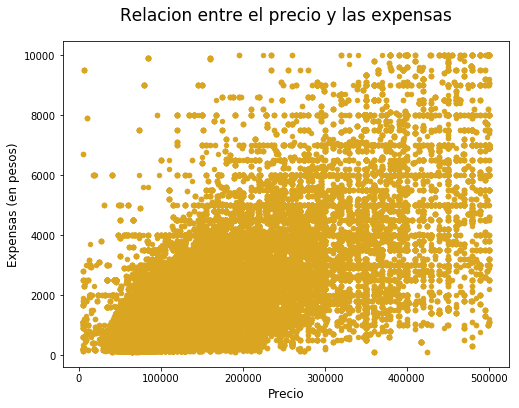

In [77]:
expensas_y_precio = expensas.loc[(expensas.price_aprox_usd.notnull()) & (expensas.price_aprox_usd <= 500000) & (expensas.price_aprox_usd > 100),:]
plot = expensas_y_precio.plot.scatter(y = 'expenses', x = 'price_aprox_usd', color = 'goldenrod');
plot.set_ylabel("Expensas (en pesos)")
plot.set_xlabel("Precio")
plot.set_title("Relacion entre el precio y las expensas")

plt.savefig('informe/imagenes/Relacion_precio_expensas.png', bbox_inches = 'tight', pad_inches = 0.5)

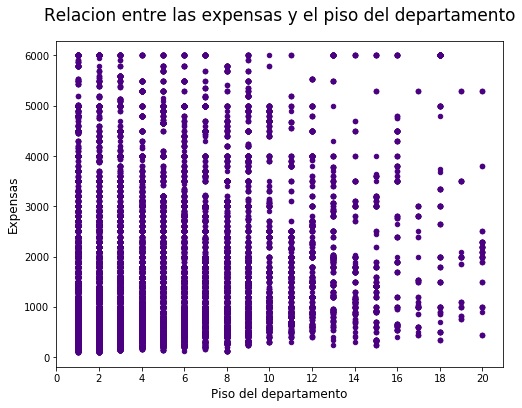

In [78]:
expensas_y_piso = expensas.loc[(expensas.floor.notnull()) & (expensas.floor <= piso_maximo) & (expensas.expenses <= 6000),:]
plot = expensas_y_piso.plot.scatter(y = 'expenses', x = 'floor', color = 'indigo');
plot.set_ylabel("Expensas")
plot.set_xlabel("Piso del departamento")
plot.set_title("Relacion entre las expensas y el piso del departamento");
plot.set_xticks(list(range(0,21,2)));

plt.savefig('informe/imagenes/Relacion_expensas_piso.png', bbox_inches = 'tight', pad_inches = 0.5)

#### cuanto mas caro mas expensas paga

# Analizando fecha de creacion y fecha de publicacion

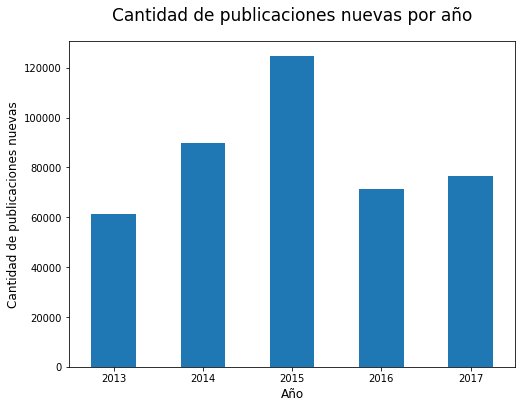

In [19]:
publicaciones = propiedades.loc[(propiedades.Year == propiedades.Year_created) & (propiedades.Month == propiedades.Month_created),['Month','Year']]
plot = publicaciones.groupby('Year').agg([np.size,np.mean])[('Month', 'size')].plot(kind = 'bar', rot = 0);
plot.set_ylabel("Cantidad de publicaciones nuevas")
plot.set_xlabel("Año")
plot.set_title("Cantidad de publicaciones nuevas por año")

plt.savefig('informe/imagenes/cantidad_publicaciones_nuevas_por_anio.png', bbox_inches = 'tight', pad_inches = 0.5)

#### Tener en cuenta que 2017 no termino, y ya tiene mas que 2016 y 2013

In [20]:
publicados = propiedades.loc[:,['lat','lon','cantidad_meses_publicado', 'Year','Month']].groupby(['lat','lon']).max()
publicados.head()

cantidad_meses_publicado  Year  Month
lat        lon                                               
-89.999744  135.000000                         2  2015     11
-87.953559  164.531250                         3  2015     11
-76.516815  100.000000                         4  2014     11
-58.804368  58.804368                          3  2014     12
-58.430839 -34.571160                          3  2014     12

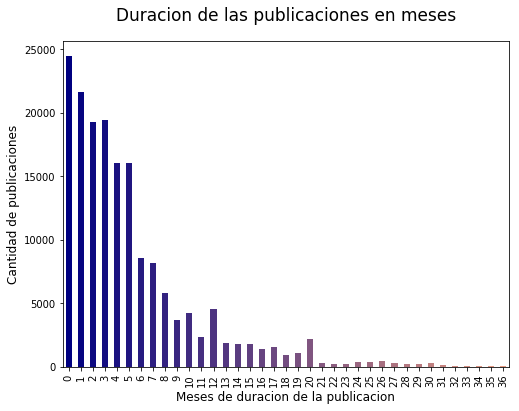

In [21]:
publicados = publicados.loc[(publicados.Year != 2017) | (publicados.Month < 7),:] #Elimino los de julio 2017 porque puede ser que no hayan terminado
publicados = publicados.loc[(publicados.cantidad_meses_publicado >= 0) & (publicados.cantidad_meses_publicado <= 36),:]
publicados = publicados.groupby('cantidad_meses_publicado').agg([np.size,np.mean])[('Year','size')]

my_colors = [(x/40.0, x/60.0, 0.5) for x in range(len(publicados))]

plot = publicados.plot(kind = 'bar', color = [my_colors]);
plot.set_ylabel("Cantidad de publicaciones")
plot.set_xlabel("Meses de duracion de la publicacion")
plot.set_title("Duracion de las publicaciones en meses")

plt.savefig('informe/imagenes/Duracion_publicaciones_en_meses.png',bbox_inches = 'tight', pad_inches = 0.5)

## Precio según la distancia a estadios

In [22]:
solo_capital['distancia_estadios'].describe()

count    854010.000000
mean          2.163391
std           4.261051
min           0.016482
25%           1.054489
50%           1.623409
75%           2.337971
max          73.379965
Name: distancia_estadios, dtype: float64

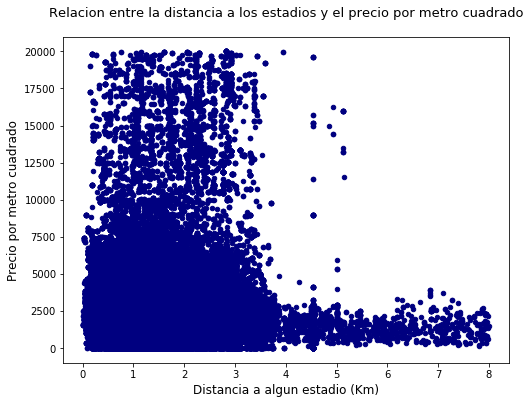

In [23]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_estadios < 8),:]
plot = dist.plot.scatter(x = 'distancia_estadios', y = 'price_usd_per_m2', color = 'navy');
plot.set_xlabel("Distancia a algun estadio (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a los estadios y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_estadios_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y distancia a ferrocarriles

In [24]:
solo_capital['distancia_ferrocarril'].describe()

count    854010.000000
mean          1.476525
std           4.215710
min           0.004265
25%           0.580326
50%           0.914144
75%           1.387432
max          73.071740
Name: distancia_ferrocarril, dtype: float64

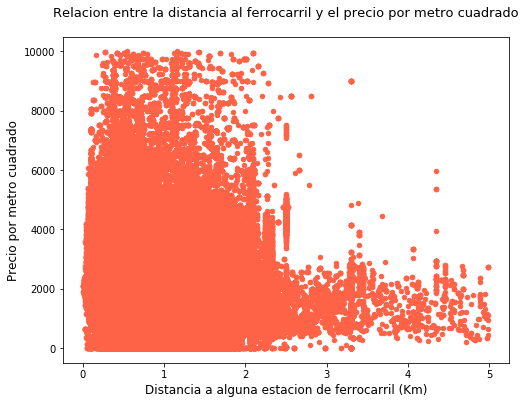

In [25]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 10000) & \
                        (solo_capital.distancia_ferrocarril < 5),:]
plot = dist.plot.scatter(x = 'distancia_ferrocarril', y = 'price_usd_per_m2', color = 'tomato');
plot.set_xlabel("Distancia a alguna estacion de ferrocarril (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia al ferrocarril y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_ferrocarril_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y cantidad de servicios cerca

### Servicios: Bibliotecas, bomberos, comisarias, hospitales, universidades, clinicas y centros medicos

In [ ]:
solo_capital['servicios'].describe()

In [ ]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & \
                        (solo_capital.servicios < 100),:]
plot = dist.plot.scatter(x = 'servicios', y = 'price_usd_per_m2', color = 'green');
plot.set_xlabel("Cantidad de servicios cercanos")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la cantidad de servicios cercanos y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_cantidad_servicios_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y zonas de inundaciones

In [26]:
solo_capital['Zona_inundacion'].value_counts()

False    741463
True     112547
Name: Zona_inundacion, dtype: int64

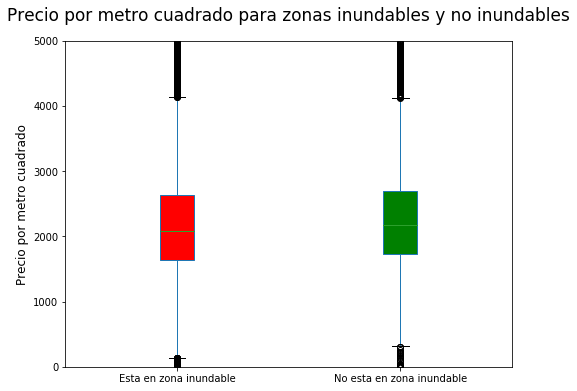

In [27]:
inundaciones = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) ,\
                               ['lat','price_usd_per_m2', 'Zona_inundacion']]\
                .pivot_table(index='lat',columns='Zona_inundacion')
inundaciones.columns = inundaciones.columns.droplevel()
boxplot = inundaciones.plot.box(patch_artist=True,return_type='dict', \
                                title="Precio por metro cuadrado para zonas inundables y no inundables");
ax=plt.gca()
ax.set_ylabel('Precio por metro cuadrado')
ax.set_xticklabels(['Esta en zona inundable', 'No esta en zona inundable'])
ax.set_ylim([0,5000]);


colors = ['red' , 'green'] 
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('informe/imagenes/Precio_m2_en_zonas_inundables.png',bbox_inches = 'tight', pad_inches = 0.5)

## Relacion entre precio y cercania a las villas

In [2]:
solo_capital = pd.read_csv('/home/agustin/Escritorio/solo_capital2.csv')
solo_capital.head(1)

created_on currency  expenses fecha_de_publicacion  floor        lat  \
0  2012-08-08      NaN       NaN           2013-07-01   10.0 -34.561208   

         lon place_name               place_with_parent_names  price  \
0 -58.464514   Belgrano  |Argentina|Capital Federal|Belgrano|    NaN   

         ...         Month  Year_created  Month_created  \
0        ...             7          2012              8   

   cantidad_meses_publicado distancia_subtes  distancia_ferrocarril  \
0                        11         0.649099               0.719974   

  distancia_monumentos  Zona_inundacion  distancia_estadios  distancia_villas  
0             2.778648             True            1.802064          2.363494  

[1 rows x 29 columns]

In [3]:
min(solo_capital.distancia_villas)

0.0

In [6]:
solo_capital.loc[:, 'distancia_villas'] = solo_capital.loc[:,'distancia_villas'].apply(lambda x: 0 if x < 0 else x)

In [8]:
min(solo_capital.distancia_villas)

0.0

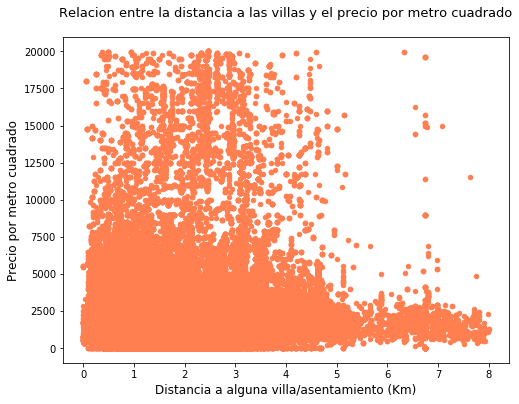

In [20]:
dist = solo_capital.loc[(solo_capital.price_usd_per_m2.notnull()) & (solo_capital.price_usd_per_m2 < 20000) & (solo_capital.distancia_villas < 8),:]
plot = dist.plot.scatter(x = 'distancia_villas', y = 'price_usd_per_m2', color = 'coral');
plot.set_xlabel("Distancia a alguna villa/asentamiento (Km)")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Relacion entre la distancia a las villas y el precio por metro cuadrado",size = 13);

plt.savefig('informe/imagenes/Relacion_distancia_villa_precio_m2.png',bbox_inches = 'tight', pad_inches = 0.5)

## Casos especificos usando la descripcion

In [2]:
propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/properati-6.csv')

In [3]:
tiene_precio = propiedades['price_usd_per_m2'].notnull()

In [4]:
def tiene_cadena(cadena, lista):
    cadena = str(cadena)
    cadena = cadena.lower()
    resultado = False
    for x in lista:
        resultado = resultado or (x in cadena)
    return resultado

### Precio segun pileta

In [5]:
cadenas = ['pileta', 'piscina', 'picina','pisina']
propiedades.loc[:,'Pileta'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [6]:
propiedades.Pileta.describe()

count     81150
unique        2
top       False
freq      55937
Name: Pileta, dtype: object

In [7]:
pileta = propiedades[tiene_precio].loc[ :,['Pileta','price_usd_per_m2']]
pileta = pileta.groupby('Pileta').agg([np.size,np.mean])

pileta.head()

price_usd_per_m2             
                   size         mean
Pileta                              
False           46715.0  2958.861774
True            21968.0  3067.166324

In [15]:
pileta = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['Pileta','price_usd_per_m2','lat']]
pileta = pd.pivot_table(pileta, values='price_usd_per_m2', columns=['Pileta'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

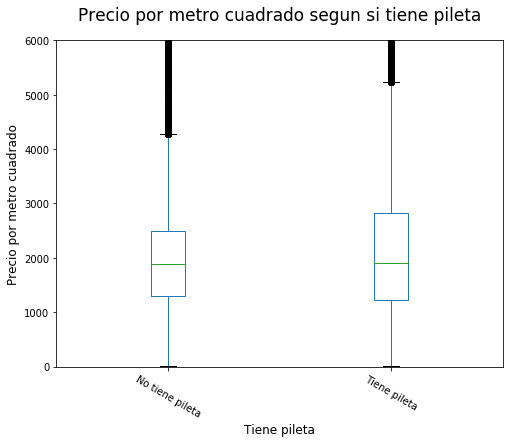

In [20]:
plot = pileta.plot(kind='box', title = "Precio por metro cuadrado segun si tiene pileta", rot = -30);
plot.set_xlabel("Tiene pileta")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene pileta', 'Tiene pileta'])
plot.set_ylim([0,6000])

### Precio si tiene aire acondicionado

In [21]:
cadenas = ['aire frio', 'aire acondicionado', 'split', 'aires acondicionados']
propiedades.loc[:,'aire'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [22]:
propiedades.aire.describe()

count     81150
unique        2
top       False
freq      67541
Name: aire, dtype: object

In [23]:
propiedades[tiene_precio].loc[ :,['aire','price_usd_per_m2']].groupby('aire').agg([np.size,np.mean]).head()

price_usd_per_m2             
                  size         mean
aire                               
False          56490.0  2991.965237
True           12193.0  3000.625056

In [26]:
aire = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['aire','price_usd_per_m2','lat']]
aire = pd.pivot_table(aire, values='price_usd_per_m2', columns=['aire'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

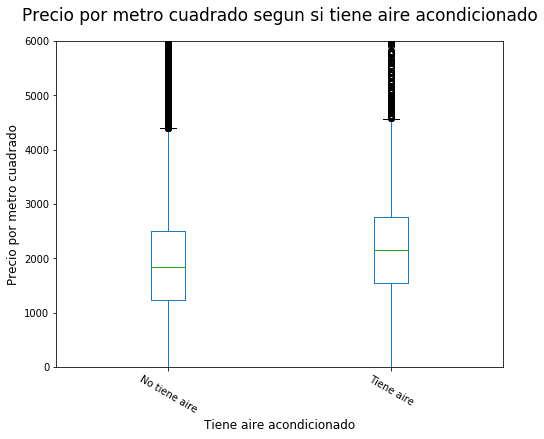

In [43]:
plot = aire.plot(kind='box', title = "Precio por metro cuadrado segun si tiene aire acondicionado", rot = -30);
plot.set_xlabel("Tiene aire acondicionado")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene aire', 'Tiene aire'])
plot.set_ylim([0,6000])

### Precio si tiene cochera

In [44]:
cadenas = ['cochera', 'garage']
propiedades.loc[:,'cochera'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [45]:
propiedades.cochera.describe()

count     81150
unique        2
top       False
freq      46362
Name: cochera, dtype: object

In [46]:
propiedades[tiene_precio].loc[ :,['cochera','price_usd_per_m2']].groupby('cochera').agg([np.size,np.mean]).head()

price_usd_per_m2             
                    size         mean
cochera                              
False            38875.0  3038.321134
True             29808.0  2935.051109

In [47]:
garage = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['cochera','price_usd_per_m2','lat']]
garage = pd.pivot_table(garage, values='price_usd_per_m2', columns=['cochera'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

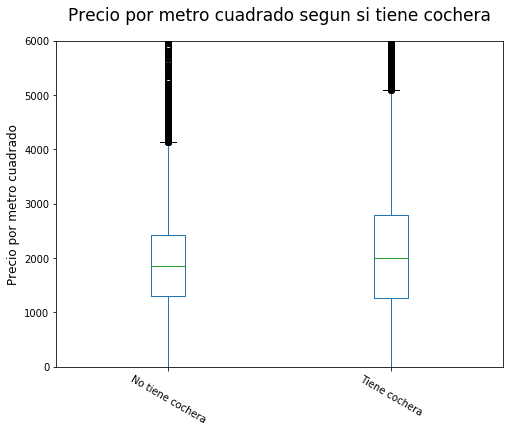

In [50]:
plot = garage.plot(kind='box', title = "Precio por metro cuadrado segun si tiene cochera", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene cochera', 'Tiene cochera'])
plot.set_ylim([0,6000])

### Tiene lago/vista al mar

In [51]:
cadenas = ['lago', 'mar']
propiedades.loc[:,'lago'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [52]:
propiedades.lago.describe()

count     81150
unique        2
top       False
freq      58120
Name: lago, dtype: object

In [53]:
propiedades[tiene_precio].loc[ :,['lago','price_usd_per_m2']].groupby('lago').agg([np.size,np.mean]).head()

price_usd_per_m2             
                  size         mean
lago                               
False          48175.0  3035.720469
True           20508.0  2894.329235

In [54]:
lago = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['lago','price_usd_per_m2','lat']]
lago = pd.pivot_table(lago, values='price_usd_per_m2', columns=['lago'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

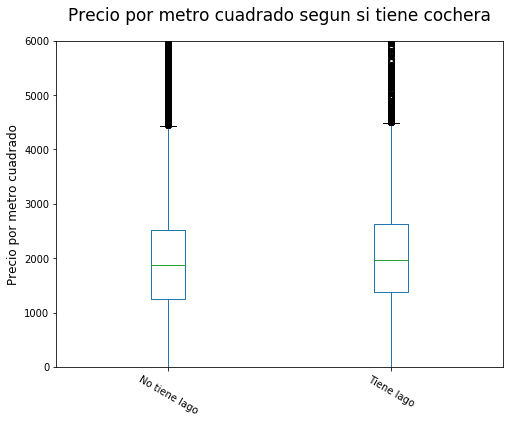

In [55]:
plot = lago.plot(kind='box', title = "Precio por metro cuadrado segun si tiene cochera", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene lago', 'Tiene lago'])
plot.set_ylim([0,6000])

### Tiene parrilla

In [56]:
cadenas = ['parrilla', 'asador', 'asado', 'asadera']
propiedades.loc[:,'parrilla'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [57]:
propiedades.parrilla.describe()

count     81150
unique        2
top       False
freq      51297
Name: parrilla, dtype: object

In [58]:
propiedades[tiene_precio].loc[ :,['parrilla','price_usd_per_m2']].groupby('parrilla').agg([np.size,np.mean]).head()

price_usd_per_m2             
                     size         mean
parrilla                              
False             42778.0  2929.964819
True              25905.0  3098.425112

In [60]:
parrilla = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['parrilla','price_usd_per_m2','lat']]
parrilla = pd.pivot_table(parrilla, values='price_usd_per_m2', columns=['parrilla'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

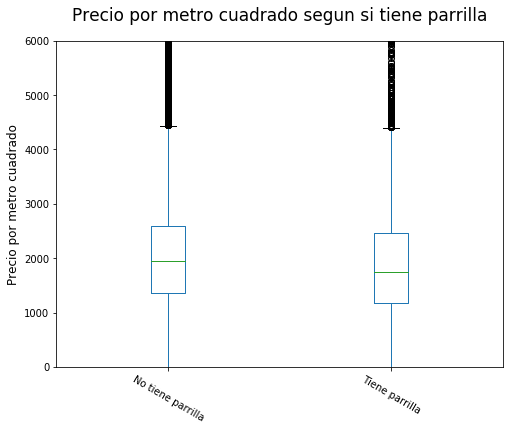

In [63]:
plot = parrilla.plot(kind='box', title = "Precio por metro cuadrado segun si tiene parrilla", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene parrilla', 'Tiene parrilla'])
plot.set_ylim([0,6000])

### Tienen gimnasio

In [64]:
cadenas = ['gimnasio', 'gym', 'gimnacio']
propiedades.loc[:,'gimnasio'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [65]:
propiedades.gimnasio.describe()

count     81150
unique        2
top       False
freq      73319
Name: gimnasio, dtype: object

In [66]:
propiedades[tiene_precio].loc[ :,['gimnasio','price_usd_per_m2']].groupby('gimnasio').agg([np.size,np.mean]).head()

price_usd_per_m2             
                     size         mean
gimnasio                              
False             61827.0  2923.740519
True               6856.0  3622.612671

In [67]:
gim = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['gimnasio','price_usd_per_m2','lat']]
gim = pd.pivot_table(gim, values='price_usd_per_m2', columns=['gimnasio'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

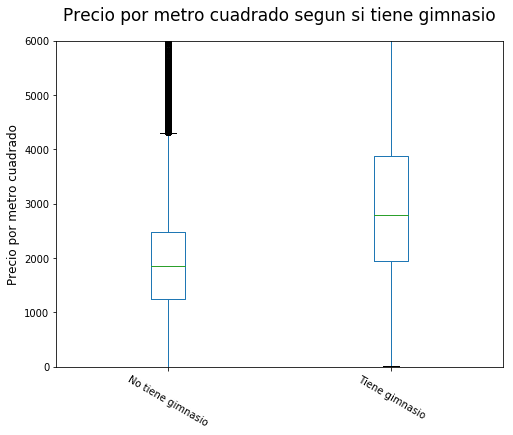

In [69]:
plot = gim.plot(kind='box', title = "Precio por metro cuadrado segun si tiene gimnasio", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene gimnasio', 'Tiene gimnasio'])
plot.set_ylim([0,6000])

In [ ]:
# Son pocos pero mas caros. Pensar en otros posibles sinonimos para ver de que

### Tiene elementos que aportan a la seguridad

In [70]:
cadenas = ['vigilancia', 'seguridad', 'alarma', 'blindado', 'blindaje', 'guardia']
propiedades.loc[:,'seguridad'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [71]:
propiedades.seguridad.describe()

count     81150
unique        2
top       False
freq      70496
Name: seguridad, dtype: object

In [72]:
propiedades[tiene_precio].loc[ :,['seguridad','price_usd_per_m2']].groupby('seguridad').agg([np.size,np.mean]).head()

price_usd_per_m2             
                      size         mean
seguridad                              
False              59068.0  2934.546226
True                9615.0  3355.690177

In [73]:
vig = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['seguridad','price_usd_per_m2','lat']]
vig = pd.pivot_table(vig, values='price_usd_per_m2', columns=['seguridad'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

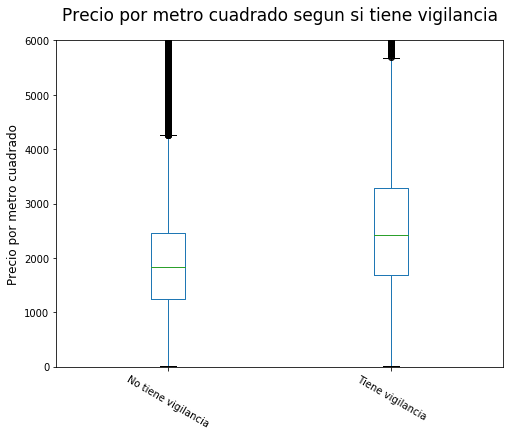

In [75]:
plot = vig.plot(kind='box', title = "Precio por metro cuadrado segun si tiene vigilancia", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene vigilancia', 'Tiene vigilancia'])
plot.set_ylim([0,6000])

### Tiene piso/ losa radiante

In [88]:
cadenas = ['losa radiante', 'piso radiante', 'pisoradiante', 'loza radiante', 'los radiantes', 'radante']
propiedades.loc[:,'losa_radiante'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [89]:
propiedades.losa_radiante.describe()

count     81150
unique        2
top       False
freq      74719
Name: losa_radiante, dtype: object

In [90]:
propiedades[tiene_precio].loc[ :,['losa_radiante','price_usd_per_m2']].groupby('losa_radiante').agg([np.size,np.mean]).head()

price_usd_per_m2             
                          size         mean
losa_radiante                              
False                  62971.0  3022.761889
True                    5712.0  2670.938141

In [91]:
losa = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['losa_radiante','price_usd_per_m2','lat']]
losa = pd.pivot_table(losa, values='price_usd_per_m2', columns=['losa_radiante'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

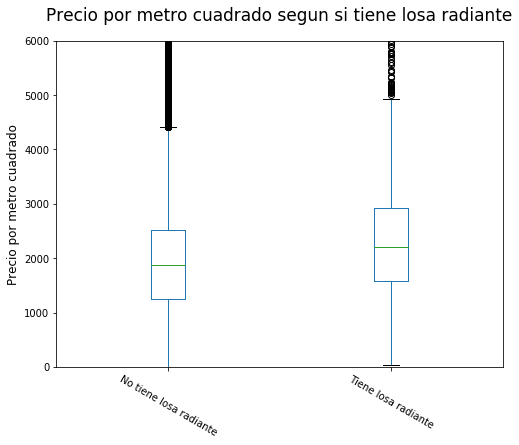

In [81]:
plot = losa.plot(kind='box', title = "Precio por metro cuadrado segun si tiene losa radiante", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene losa radiante', 'Tiene losa radiante'])
plot.set_ylim([0,6000])

### Tiene campos deportivos

In [92]:
cadenas = ['golf', 'cancha', 'tenis', 'futbol', 'basquet', 'basket', 'volley']
propiedades.loc[:,'deportes'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [93]:
propiedades.deportes.describe()

count     81150
unique        2
top       False
freq      77031
Name: deportes, dtype: object

In [94]:
propiedades[tiene_precio].loc[ :,['deportes','price_usd_per_m2']].groupby('deportes').agg([np.size,np.mean]).head()

price_usd_per_m2             
                     size         mean
deportes                              
False             65057.0  2958.741412
True               3626.0  3617.180774

In [95]:
deportes = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['deportes','price_usd_per_m2','lat']]
deportes = pd.pivot_table(deportes, values='price_usd_per_m2', columns=['deportes'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

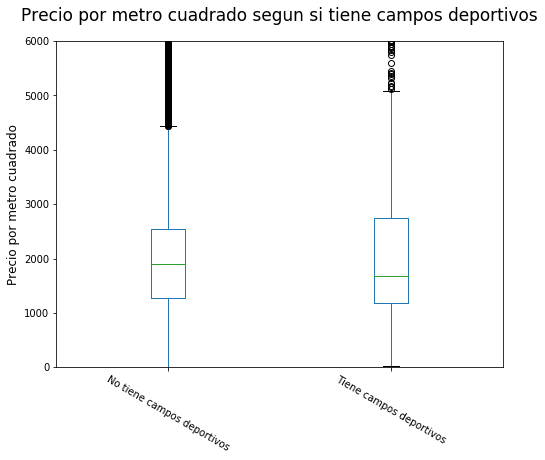

In [97]:
plot = deportes.plot(kind='box', title = "Precio por metro cuadrado segun si tiene campos deportivos", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene campos deportivos', 'Tiene campos deportivos'])
plot.set_ylim([0,6000])

### Tiene playroom

In [103]:
cadenas = ['juego', 'play']
propiedades.loc[:,'juegos'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [114]:
propiedades.juegos.describe()

count     81150
unique        2
top       False
freq      71900
Name: juegos, dtype: object

In [105]:
propiedades[tiene_precio].loc[ :,['juegos','price_usd_per_m2']].groupby('juegos').agg([np.size,np.mean]).head()

price_usd_per_m2             
                   size         mean
juegos                              
False           60489.0  2955.795411
True             8194.0  3271.860987

In [106]:
juegos = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['juegos','price_usd_per_m2','lat']]
juegos = pd.pivot_table(juegos, values='price_usd_per_m2', columns=['juegos'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

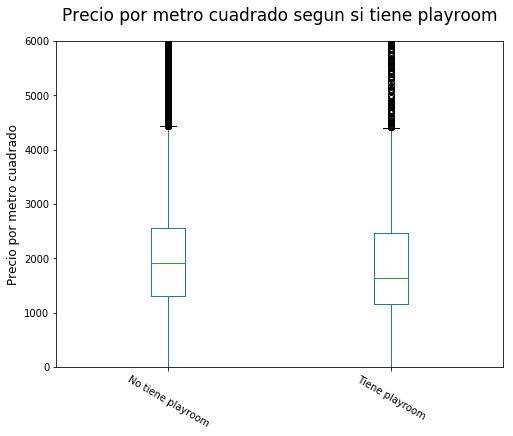

In [108]:
plot = juegos.plot(kind='box', title = "Precio por metro cuadrado segun si tiene playroom", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
ax.set_xticklabels(['No tiene playroom', 'Tiene playroom'])
plot.set_ylim([0,6000])

### Tiene jardin

In [113]:
cadenas = ['jardin', 'jardín', 'parque']
propiedades.loc[:,'jardin'] = propiedades.loc[:, 'description'].apply(lambda x: tiene_cadena(x, cadenas))

In [115]:
propiedades.jardin.describe()

count     81150
unique        2
top       False
freq      57706
Name: jardin, dtype: object

In [116]:
propiedades[tiene_precio].loc[ :,['jardin','price_usd_per_m2']].groupby('jardin').agg([np.size,np.mean]).head()

price_usd_per_m2             
                   size         mean
jardin                              
False           48266.0  2968.577837
True            20417.0  3052.424924

In [117]:
jardin = propiedades[tiene_precio].loc[propiedades.price_usd_per_m2 <= 20000,['jardin','price_usd_per_m2','lat']]
jardin = pd.pivot_table(jardin, values='price_usd_per_m2', columns=['jardin'],index = 'lat')
pileta.head(2)

Pileta            False       True 
lat                                
-38.416097  1221.838485  576.923077
-35.123085          NaN  828.571429

(0, 6000)

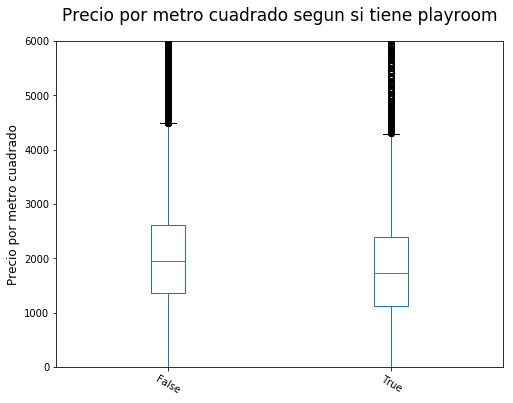

In [118]:
plot = jardin.plot(kind='box', title = "Precio por metro cuadrado segun si tiene playroom", rot = -30);
#plot.set_xlabel("Tiene cochera")
plot.set_ylabel("Precio por metro cuadrado")
ax=plt.gca()
#ax.set_xticklabels(['No tiene playroom', 'Tiene playroom'])
plot.set_ylim([0,6000])

In [56]:
aire frio
cochera
piso radiante/ losa radiante
lago
golf
parrilla
gimnasio
vigilancia
cancha
tenis
cafe
juegos

parque

-1

In [112]:
for i in range(len(propiedades)):
    if "jardín" in str(propiedades.description[i]):
        print (propiedades.description[i])

ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros Cubiertos: 115,23m²Contado U$D250.000HAUS VILLAGE es un complejo residencial de 20 casas con cochera y jardín propio, dentro del Barrio Cerrado Buenos Aires Village.Todas las unidades tienen entrada para auto, en planta baja cuentan con un toilette, living comedor con cocina separada.Patio exclusivo y, en planta alta, 3 dormitorios con espacio para placard (uno en suite).Realizados en una estructura monolítica de Hormigón Armado sobre platea de fundación y aberturas de PVC con DVH. La calidad de la construcción conjuga lo moderno y lo funcional, con un cuidado especial por lo estético. Son amplias superficies vidriadas que permiten vivir el verde del jardín en todo momento. El barrio cerrado cuenta con una doble entrada, lo que permite una mejor circulación interna de vehículos. Ofrece excelentes alternativas para los accesos al barrio, una entrada es por la autopista del Buen Ayre y la otra por la calle Flaubert. EasyBroker ID: EB-AN8955


Living comedor en L , cocina amueblada, 2 dormitorios con placard, baño con bañera, jardín, parrilla , cuarto de herramientas, galería /cochera con portón corredizo.
Living c/hogar en desnivel, comedor y cocina c/pasaplatos, 1 dormitorio grande c/plac. y baño c/ducha. PA: dormitorio grande c/A.Ac. Afuera jardín, patio c/parrilla y pileta de fibra. FM2517/3Información Adicional: Luminosidad: Luminoso
XINTEL(LIS-LCI-150) Venta de Casa 5 ambientes en San Antonio De PaduaExcelente Casa tipo Ph, muy buen entorno y ubicacion !Posee 3 dormitorios pisos de parquet, baño c/ bañera, hidromasaje, cocina con bajo mesada y alacenas con vidrio repartidos. Living-comedor c/pisos cerámica, ventanas en todos los ambientes (enrejadas), Fondo verde, con jardín y Parrilla. Terraza, con cuarto de herramientas de 5x3.Imperdible Oportunidad !Contacto: 011- / 15-
XINTEL(LIS-LCI-25) VENTA- DEPARTAMENTO 3 AMBIENTESIncreíble Departamento en Venta tipo Ph- En San Antonio de Padua   a tan solo 5 cuadras de la esta

Corredor Responsable: Uno Bienes Raices SRL - CMCPSI 5821Contacto: Paula Cavallero - MLS ID # 420041154-134PH al fondo, en planta baja, con entrada independiente. Sólo dos unidades. Se accede desde jardín arbolado de uso exclusivo de la propiedad, gran pulmón que lo hace único. Living Comedor Cocina remodelada Dos habitaciones conectadas entre sí (se accede a la segunda desde la primera) y con acceso a patio interno. Tercera habitación a la que se llega desde el patio interno. Baño de época, con ducha. Todas los ambientes con muy buena ventilación e iluminación. A escasas tres cuadras de la estación de tren y cerca de gran cantidad de medios de transporte.
Corredor Responsable: Uno Bienes Raices SRL - CMCPSI 5821Contacto: Alejandro Gomez - MLS ID # 420041040-353Se trata de una casa muy práctica ubicada en la ciudad de haedo, a 5 cuadras de la avenida rivadavia.  Toda la casa se encuentra construida en una sola planta.  Posee living comedor con la cocina semi integrada, dos dormitorios 

Venta de Casa 3 AMBIENTES, CIUDAD EVITA.( Circ 4°.Secc 2°) Chalet "Individual" sobre un hermoso Lote de 17 x 34 mts.Cuenta con 2 Dormitorios, Living  con comedor, 1 baño refaccionado, cocina comedor y lavadero. Laterales libres (en uno tiene entrada para autos) y un amplio fondo con jardín.Estado original bueno.Cuenta con escritura y plano de obra aprobado por lo que es "Apto Prestamo"Lote: 558 m2 ( 17x 34)  / Superficie Cubierta: 89 m2VILA Propiedades -  - VILA PROPIEDADES
TRIPLEX  4 AMBIENTES en LINIERS, CAPITAL FEDERALVenta de TRIPLEX 4 AMBIENTES en LINIERS, a una cuadra de Av. Emilio Castro. Hermosa ubicación.  Tiene una excelente distribución en 3 plantas y un subsuelo con capacidad para 2 autos. En Planta baja se encuentra un hermoso living comedor muy luminoso, con una ventilación natural espectacular.  toilette de recepción,  cocina comedor-diario, con muebles altos y bajos y una baulera profunda, La Cocina ventila a un patio con lavadero y cuenta con un quincho con vista a un 

Casa: La misma consta de 4 dormitorios, comedor - living, cocina, baño, garaje semi cubierto, patio al fondo con parrilla, galpon al frente o local. Servicios: gas natural y agua corriente. 2 líneas de colectivos a 50 mts, escuelas a 3 cuadras (jardín, primaria y secundaria). la misma esta ubicada a 7 cuadras, supermercados y comercios a 50 mts. plazas con centro deportivo a 3 cuadras (con cancha de básquet y vóley). terreno de 10 x 27 mts. Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
Propiedad en lote central con amplio jardín arbolado. En planta alta, gran dormitorio en suite con hidromasaje, vestidor y baño completo con ducha. En planta baja living comedor con chimenea, toilette, tres dormitorios y baño completo, lindísima cocina comedor diario con grandes ventanales al jardín, lavadero. Amplia dependencia de servicio en planta alta con entrada totalmente independiente por escalera exterior. La casa tiene pisos de parquet y calefacción por rad

IMPECABLE CASA EN VENTA Bº Cº SAN ISIDRO LABRADOR.SE VENDE CON RENTA*Construida en dos plantas sobre lote al golf posee living comedor cocina toilette lavadero 3 habitaciones baños completos galería parilla pileta lindo jardín CONSULTA PARA MAS INFORMACION!Sup lote 700mts2Sup cub 200mts2*Medidas aproximadas*Gaitán, AlejandraBlanca Adelma GaitanCSI 5938[ Provista por  | Código 8703598 ]Matriculado:Blanca GaitanCMCPSI 5938Cel. +54 9 1157512210
Lote en muy buena ubicación, con jardín y pileta.Valor Lote.
IMPECABLE CASA Bº Cº SAN ISIDRO LABRADORConstruida sobre lote al Rio con estilo moderno racionalista PB: Living , comedor, cocina amplia,  escritorio, toilette de recepción, lavadero y dependencia de servicios PA: 4 habitaciones principal en suite con vestidor y baño completo , otros dormitorios en semi suite, exterior con galería parrilla super jardín parquizado pileta y muelle la casa cuenta con la calefacción por piso radiante y aires acondicionados. Ambientes con vista hermosa al rio!

Corredor Responsable: Marisol Espinosa - CMCPM 2736Contacto: Ariel Isern - MLS ID # 420631038-6Hermosa casa estilo Art-Deco  ubicada a solo 6 cuadras de la estación de morón.  En el frente hermoso jardín y entrada de vehículo. Ingresando al frente recibidor hacia la derecha tenemos dos habitaciones amplias, baño y cocina, luego living comedor (con salida al patio con galería) y a tercer dormitorio con baño en suite, también con acceso a amplio patio con parrilla y cuarto auxiliar. APTO CRÉDITO  Comunícate con  el equipo RE/ MAX  !!
Corredor Responsable: Uno Bienes Raices SRL - CMCPSI 5821Contacto: Romina Álvarez - MLS ID # 420681020-13Increíble casa de 230 mts., contruída sobre un terreno de 400 mts. cuadrados y desarrollada en dos plantas. Ideal para una familia numerosa o para quienes disfrutan de recibir amigos y familiares en su hogar y poder brindarles todas las comodidades necesarias para una estadía inolvidable. Pensada de manera funcional, en la planta baja encontramos un amplí

Corredor Responsable: Marcelo Di Girolamo - C.D.C.P.D.J.L.P 6962Contacto: Pedro Martín - MLS ID # 23 e/121 y 122. Casa ubicada sobre la calle 44 bis, próximo a la avenida 122 con rápido acceso al casco de la cuidad a 100 mts. transporte publico, entrada con un jardín pequeño, garage; living comedor amplio con estufa hogar, aire acondicionado; cuenta con jardín de invierno techado con chapa, cocina separada con bajo y sobre mesada, termotanque; baño completo, dos amplios dormitorios y el tercero mas pequeño con placard embutido; patio y quincho con parrilla.
Corredor Responsable: Marcelo Di Girolamo - C.D.C.P.D.J.L.P 6962Contacto: Roberto Eyssartier - MLS ID # 2321 e/ 85 y bv. diagonal 690. Barrio Jardín, excelente entorno proximo a las avenidas 122 y 120. Casa desarrollada en dos plantas, consta de jardín, living, cocina comedor con muebles bajo mesada,tres dormitorios con placard y piso de madera, baño con ducha, amplio patio con parrilla, garaje y lavadero cubierto. Superficie total 

Corredor Responsable: Luis Alberto De Blas - CZC 466Contacto: Daniel Burgués - MLS ID # 420501042-67Casa de 2 plantas desarrollada sobre dos lotes. Planta Baja: Living comedor, cocina y 2 baños. Habitación de servicio exterior. Garage semicubierto para dos coches. Parrilla cubierta. En Planta Alta consta de 3 habitaciones  con placards, equipadas con estufas de tiro balanceado, 2 de ellas con vista al jardín y la principal al contrafrente con vista abierta. Parque con pileta de natación.   MUDATE A LA VIDA QUE QUERES !! CONSULTAME !
Corredor Responsable: Win Bienes Raices SRL - CSI 5352Contacto: Violeta Abadia - MLS ID # 420521007-361. UBICACIÓN Y ENTORNO DE LA PROPIEDAD La propiedad  está emplazada sobre la calle Sarmiento  N°7160, en un lote de superficie de terreno 282,04mts., con 11 de frente por 25,64 mts. de fondo al Sud-Este, con espacio de retiro de la línea municipal de 3mts  A  cuatro cuadras de la Avenida Brig. Gral. Juan Manuel de Rosas, con fácil acceso a Autopista Panamer

VENTA CASA TRES AMBIENTES - VILLA ADELINACasa americana de 3 amb sobre lote propio en Parque Cisneros.  Terreno 9,50 x 19, 5.  Comedor, cocina-comedor, 2 dormitorios, baño completo, lavadero, cto de herramientas, cochera, patio con parrilla y jardín. Muy buen estado de conservación, cañeria de agua a nuevo y techo de losa con posibilidad de ampliación. Próxima a centro comercial.  ACEPTA PROPIEDAD COMO PARTE DE  -  - LEANDRO A. GUZZI C.S.I MAT Nº  5614
PB: Living y comedor, toilette, bajo escalera, cocina, comedor de diario, Family con salida al jardín, lavadero y dependencia de servicio con baño. Entrada de servicio . Pergola para 1 auto.PA:  Cuarto ppal en suite con baño compartimentado con salida al balcón. Suite Jr , 3er dormitorio grande y escritorio abierto,con baño. Interior de la casa recien pintada , aire acondicionado en casi todos los ambientes, placares por todos lados, toldo eléctrico en la galería y otro manual en la galería de la parrilla. Riego por aspersión programable

Proyecto único en Nordelta - Puerto EscondidoUnidad de 2 ambientes con amplio jardín, balcón y parrilla. Estar comedor con cocina integrada, toilette de recepción y dormitorio en suite con vestidor.Amenities: Health Club, pileta in out climatizada con solárium, hidormasaje, saunas, vestuarios, gimnasio, SUM con parrilla, juegos infantiles, laundry.Un proyecto de calidad con amarras opcionales y membresía de Nordelta Golf Club incluida en el precio.
Excelente casa quinta en Los cardales, Parque Natura.tiene la opcion de vender con 6.000 m2 mas en u$s 500.000Pb Living comedor cocina - lavadero - despensa3 dormitorios con 2 baños PA 1 dormitorio y Playroom Quincho con parrilla - vestuario y dependencia de servicio garage semicubierto para 4 autos, mas un galpón amplio jardín con pileta de 12 x 15. 
Muy buena Casa desarrollada en 2 plantasBarrio Cerrado Lomas de Benavidez PB: Living intimo con hogar, cocina comedor, gran cocina con isla con muebles altos y bajos con ventanales al jardínLav

Venta - Departamento - Argentina, Buenos Aires, Nordelta, Sendero - 2 Dormitorios - Con CocheraIMPECABLE departamento. 3 amb en PB con jardín vista al lago  del barrio El Sendero Nordelta. Galería con parrilla al lago. Cochera semi cubierta propia. Cocina integrada con barra al living,  toillete de recepción, dos dormitorios con placard (interiores). 1 baño completo3 Aires frío calor en cada ambienteLos Black out en dormitoriosLas luces, (del cuarto de los chicos, cocina, lavadero y de la entrada)Visitas con entrevistas. - CMCPSI Mat. 5604
Venta - Casa - Argentina, Buenos Aires, Zona Norte, Olivos - 3 Dormitorios - Con CocheraExcelente dúplex con detalles de categoría, muy bien ubicado a una cuadra de Av. Maipú. Living-Comedor amplio, toilette, cocina amplia con espacio para comedor diario, muebles bajo y sobre mesada italianos, patio y jardín con parrilla, cochera para un auto techada con policarbonato. En la 1º planta alta tres dormitorios, el dormitorio principal al frente en suite 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


RUCA INMUEBLES - 011- / 011-15- -  -  LINDA CASA RUSTICA en VENTA sobre HERMOSO PARQUE DE 1.250 mts2 con  PILETA.Casa desarrollada en dos plantas, con aberturas de demolicion recicladas. Ubicada en el Barrio La Bota, zona de forestación añeja y hermosa vegetación.PB:Porche de Acceso al Living en doble altura y con salida al jardín. Amplia, colorida y luminosa cocina con vista al frente. Dormitorio Principal con vista al jardín lateral. Baño completo. Lavadero al conttrafrente con salida al jardínPACirculación y estar balconeando al Living. Al frente dos dormitorios con vista al frente y al contrafrente un Dormitorio con vista al jardín lateral y un Escritorio con vista al jardín de trasero. Amplias superficies tipo altillos sobre dormitorios.ExteriorCochera lateral. Gran parque de hermosa vegetación rodeando la vivienda, con pileta de natación con borde atérmico con bomba y filtro sobre el contrafrente..Deposito y Baño de pileta debajo de torre de tanque de agua.Calidad ConstructivaCal

Desarrollado sobre un imponente lote de 32 metros de frente sobre Mendoza, el emprendimiento MendozaHo constará de 5 pisos y subsuelo para cocheras y bauleras.Contará con unidades de tipo:Loft, 2 ambientes, 3 ambientes, 3 ambientes en dúplex, 4 ambientes con jardín en dúplex, 4 ambientes con dependencia y 5 ambientes.Todas las tipologías son generosas en sus superficies y cuentan la mayoría con balcones aterrazados, amplios y vivibles con parrilla propia.AVISO LEGAL: Las descripciones arquitectónicas y funcionales, valores de expensas, impuestos y servicios, fotos y medidas de este inmueble son aproximados. Los datos fueron proporcionados por el propietario y pueden no estar actualizados a la hora de la visualización de este aviso por lo cual pueden arrojar inexactitudes y discordancias con las que surgen de los las facturas, títulos y planos legales del inmueble. Los precios indicados podrán modificarse sin previo aviso. La fechas de inicio de obra o posesión son estimadas, podrán ser

Propiedad de Muy Buena Construcción! Casa distribuida en dos plantas. En la planta baja living con hogar, comedor, cocina con salida al jardín, dependencia, lavadero, y un dormitorio con baño completo. En la planta alta tres dormitorios, dos de iguales dimensiones que comparten un baño y la suite. Y cuenta con un  Altillo que puede ser utilizado como playroom. La calefacción y el aire acondicionado son centrales. Muy buena estructura edilicia, doble pared con cámara de aire y ladrillos macizos. Cochera cubierta. Parrilla y Pileta. La propiedad se encuentra sobre dos lotes, por lo que paga doble expensas. En este momento posee un tercer lote pero el precio del mismo es aparte. En el km 47,5 de la Panamericana se encuentra uno de los Countries mas antiguos de la zona, que posee excelente infraestructura (Gas Natural, cloacas, agua corriente, etc), y 3 Club House ( uno es restaurante, otro confitería y otro destinado al sector infantil). Tiene canchas de Fútbol, paddle, tenis, hockey, Gol

Excelente casa en terreno con la mejor ubicación e impecable estado. Diseño Arq. Mario Lara.En planta baja hall de recepción, living grande con chimenea y amplios ventanales al jardín. Comedor grande y escritorio o playroom. Toilette de recepción con pisos y  mesada en carrara. Dormitorio en suite. Cocina grande con artefacto de 6 hornallas y espacio para heladera doble.Lavadero grande con patio interno para colgar ropa. Dependencias de servicio.En planta alta, hall con placeres ropa blanca,  suite principal grande con vestidor y baño en mármol y mesada de carrara. Dos dormitorios grandes cada uno en suite. Playroom o escritorio. Jardín de invierno.Todas las puertas interiores son macizas de 3 metros. Los techos son altos y las aberturas exteriores de hierro con mosquiteros. El piso es de madera. La calefacción por piso radiante y AA individual en todos los ambientes. Las galerías son con toldos eléctricos. Parrilla con barra. Pileta. Riego automático por aspersión y goteo. Garage cubi

Linda casa en venta de 300 m2 cubiertos sobre terreno de 850 m2. Cochera doble techada, galería cerrada, jardín con buenos árboles y plantas y pileta grande.Planta baja: hall de entrada amplio, toilette y buen living comedor. Cocina bien equipada con comedor de diario, despensa y lavadero. Cuenta con dependencia de servicio con baño completo.Planta alta: suite principal grande con terraza privada, baño compartimentado con box de ducha y jacuzzi, vestidor y altillo. Tres dormitorios grandes con buenos placares y un baño completo.Afuera: galería cerrada con salamandra, perfecta para usar también en invierno. Parrila, barra y pileta grande. Es una casa cómoda, ideal para familias grandes. Contacto: / 000Cristián Mieres. C.M.C.P.S.I. Nº 5151
Venta de casa en Tortugas CC, desarrollada en una sola planta. Comodidades: living y comedor. Toilette, cocina con comedor de diario.  Lavadero. Dependencias de servicio con baño.  dormitorio en suite con baño. 2 dormitorios con placards con 1 baño com

Implantado en un lugar estrategico, de frondosa arboleda al margen del Río Reconquista, frente al casco histórico de Tigre y en la Av. Santa María de las Conchas que comunica con el Centro Comercial de Nordelta.Un diseño moderno, transparente, de departamentos apaisados y grandes balcones, conectados al entorno privilegiado de nuestro terreno.Amplias y extensas visuales en un barrio residencial, de tejas rojas y árboles, con transporte público en la puerta, frente a la Av. Liniers y accesos próximos a Panamericana y Caminos de los Remeros.AMENITIES Y SERVICIOS Piscina infinity pool sobre jardín al Rio, rodeada de 500 m2 de amplios jardines arbolados                  Calefacción por piso radiante, agua caliente central con sistema sustentable de ahorro energético           Gimnasio, Solarium,  Sauna, SUM y Parrillas         3 cocheras de cortesía de acceso públicoAmplio Lobby con cabina de Seguridad 24 hs.Fideicomiso al costo  30% anticipo + 40 cuotas fijas.***Consultenos a  / 15  - **


Excelente chalet en inmejorable ubicación , ubicado en pleno corazón de Olivos Golf, zona muy residencial , cerca de accesos y colegios, construcción muy solida , refaccionada totalmente hace 20 años , amplio lote con un gran jardín y  un pulmón de manzana bajo y hermosa arboleda.Chalet desarrollado en tres plantas.-Planta baja:amplio hall de recepción con toilette  (con ducha en pb )y placard , recibidor, living y comedor por separado con hogar tipo natural , muy amplia cocina comedor diario, muebles de cocina completos, artefacto cocina común , con vista al jardín que posee una pileta completa, de material con filtro, galería techada, garage para varios autos con portón automático levadizo , lavadero cubierto .Planta alta: 4 dormitorios , 2 suites  (1 compart c/vent )1 baño completo , dependencia con baño .-Tercer planta: play amplio .-Escritorio o 5º dormitorio, aire acondicionado (a convenir ) , balcón terraza al contrafrente , en aberturas rejas persianas barrio de madera, vidrios

Magnifica Casa en Lagos del Golf al Lago.PLANTA BAJAHall de entrada en triple altura. Living y comedor. Amplia cocina con isla central, comedor diario y family con acceso al jardín. Escritorio. Toilette completo. Escalera. Lavadero. Dormitorio de servicio con baño en suite. Amplia galería con baño de pileta, parrilla y barra. Garaje semi-cubierto para dos autos. PRIMERA PLANTAMaster Suite con terraza al jardín, vestidor doble completo y baño compartimentado con hidromasaje doble y box de ducha. 3 Suites Junior, una con terraza al jardín y otra con una terraza al frente.SEGUNDA PLANTAGran Playroom de 80 M2. Habitación y baño completo.Exterior: Gran piscina con desborde infinito. Amplia galería con parrilla y jardín.
Excelente departamento en Terrazas de la Bahía, Nordelta, al Río.Cocina independienteLiving- comedor con doble altura1 dormitorio1 baño completoPlacardsTerraza con parrilla y posibilidad de cerrarla, estilo jardín de inviernoCaldera dualAire acondicionado en living y dormito

Impecable casa en una planta. Esta compuesta de  cocina, comedor y living.  Cuatro habitaciones, una de ellas  en suite. Quincho con parrilla.  Hermoso jardín con piscina. Dos cocheras. Escriturable, no dude en consultar!! 
Lindo chalet en 1 planta:  hall, living-comedor,2/3 dormitorios,  escritorio o 3° dormitorio, cocina y amplio comedor diario, dependencias de servicio, garaje 1 coche, buhardilla, jardín.-
ESCRITURABLE! 4 DORMITORIOS!  IMPECABLE! Cochera cubierta y espacio guardacoches para dos autos. Porch y Hall de acceso, living con hogar y comedor con barra tipo bar, cocina con muebles completos con equipamiento en U, quincho con parrilla con cerramiento en chapa con sector lavadero integrado, con salida al parque dormitorio principal en suite y 2 dormitorio también hacia el jardín y escritorio al frente, baño completo, dos dormitorios más en planta alta. Refrigeración por aire acondicionado tipo split. Jardín con grama bahiana y piscina de 5 x 8  con playa húmeda y revestida en

In [28]:
# link con algunos colores para los graficos
# https://matplotlib.org/users/colors.html
#https://matplotlib.org/examples/color/named_colors.html